# Cass-Koopmans Model


In [1]:
using Roots
using NLsolve
using DataFrames
using Parameters
using Printf
using Plots


We follow closely Chen et al (AER). The planner's problem is
$$
\begin{aligned}
& \max _{\left\{c_t, h_t, k_{t+1}\right\}} \sum_{t=0}^{\infty} \beta^t N_t \log c_t \\
& \text { subject to } \\
& K_{t+1}+C_t=\left(1-\tau_t\left(r_t-\delta\right)\right) K_t+A_t K_t^\alpha\left(\gamma^t L_t\right)^{1-\alpha}
\end{aligned}
$$
where $\tau_t$ are capital income taxes. Also, assume that the size of the household is fixed $N_t=N_0$, and $\gamma=\left(A_{t+1} / A_t\right)^{1 /(1-\alpha)}$.

$$
\begin{gathered}
\widetilde{k}_{t+1}=\frac{1}{\gamma_t}\left[A_t\widetilde{k}_t^\alpha +(1-\delta) \widetilde{k}_t-\widetilde{c}_t\right]
\\
\widetilde{c}_{t+1}=\beta \frac{\widetilde{c}_t}{\gamma_t}\left\{(1-\delta)+\alpha A(\widetilde{k}_{t+1})^{\alpha-1}\right\}
\end{gathered}
$$
with $k_0 = \bar{k}$

$$
\begin{gathered}
\widetilde{a}_{t+1}=\frac{1}{\gamma_t}\left[r \widetilde{a}_{t+1}+ y_t -\widetilde{c}_t\right]
\\
\widetilde{c}_{t+1}=\beta \frac{\widetilde{c}_t}{\gamma_t} r
\end{gathered}
$$
with $a_0 = \bar{a}$

In [2]:
# Initial guess
p_gen = @with_kw (δ=0.10,    # depreciation rate for capital at SS
                    β=0.96327,  # utility discount factor 
                    α=0.363,     # share of capital in production
                    τk=0.0,
                    ψ=1.45,   # parameter for disutility of labor
                    n=1.02,
                    γ_ss = 1.0, #1.0315,
                    γ_new = 1.0, # 1.01*γ_ss,
                    A=1.0,
                    Th=105, 
                    N=200,
                    ϵ=0.001,
                    transp =100,
                    ky_data=3.6,
                    γt = [γ_ss;γ_new*ones(N-1)]
                 );

## Solving the system (simulating)

$$
\begin{gathered}
\widetilde{k}_{t+1}=\frac{1}{\gamma_t}\left[A_t\widetilde{k}_t^\alpha +(1-\delta) \widetilde{k}_t-\widetilde{c}_t\right] (1)
\\
\widetilde{c}_{t+1}=\beta \frac{\widetilde{c}_t}{\gamma_t}\left\{(1-\delta)+\alpha A(\widetilde{k}_{t+1})^{\alpha-1}\right\} (2)
\end{gathered}
$$
with $k_0 = \bar{k}$

## Shooting: 
1. Guess a value for $\widetilde{c}_t$
2. Use equation (1) to obtain $\widetilde{k}_{t+1}$
3. Use equation (2) to obtain $\widetilde{c}_{t+1}$
4. Use equation (1) to obtain $\widetilde{k}_{t+2}$
...
....

In [3]:
function shooting(ck, c0, k0)
    (;β,α,γt,δ,N,A) = ck

    kt   = NaN*ones(N+1)
    ct   = NaN*ones(N+1)
    #kt   = Vector{Union{Missing, Float64}}(missing, N+1)
    #ct   = Vector{Union{Missing, Float64}}(missing, N+1)
    kt[1] = k0
    ct[1] = c0

    for t = 1:N
        #println(t," ct : ",ct[t],"  kt : ",kt[t])
        y_deprec = A*kt[t]^α + (1-δ)*kt[t]
        if ct[t]>=y_deprec
            #println("initial consumption is not feasible")
            break
        end
        #println(t," ct : ",ct[t],"  yt_dep : ",y_deprec,"  kt : ",kt[t])
        kt[t+1] = (1/γt[t])*(y_deprec - ct[t])
        ct[t+1] = (1/γt[t])*ct[t]*β*( 1-δ + α*A*(kt[t])^(α-1) )
    end
    ct,kt
end

shooting (generic function with 1 method)

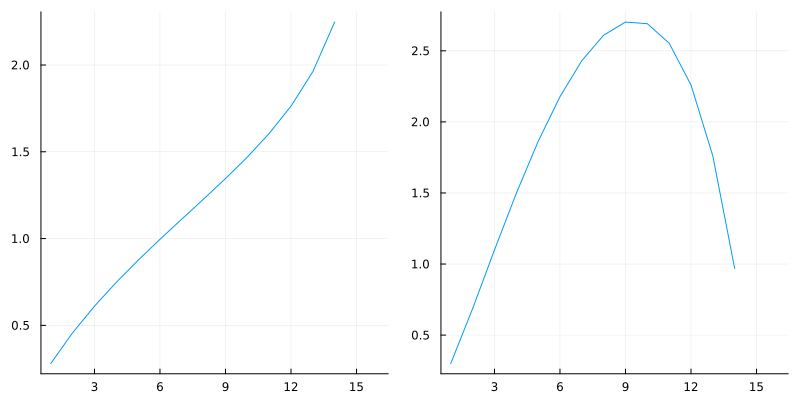

In [4]:
ck = p_gen( β=0.95, δ=0.02, α=0.33,N =15)
ct,kt=shooting(ck, 0.28, 0.3);
pk=plot(kt, legend=false)
pc=plot(ct, legend=false)
pg_shooting=plot(pc,pk,size=(800, 400))


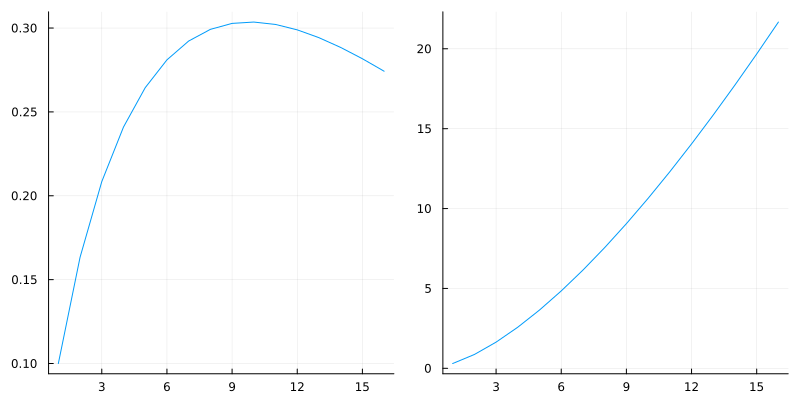

In [5]:
ck = p_gen( β=0.95, δ=0.02, α=0.33,N =15)
ct,kt=shooting(ck, 0.1, 0.3);
pk=plot(kt, legend=false)
pc=plot(ct, legend=false)
pg_shooting=plot(pc,pk,size=(800, 400))
